In [37]:
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import linear_model
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6  #To make it large 

In [38]:
df = pd.read_excel('/content/exo1serie3.xlsx' , index_col='Vendeur')


#**EXO 01**

In [39]:
df.rename(columns={"Prime(10**3)": "prime", "Productivite(%)": "productivite"} , inplace=True)
df

,prime,productivite
Vendeur,,
1,0.0,10
2,0.5,15
3,1.0,25
4,1.5,30
5,2.0,40
6,5.0,60
7,10.0,80


In [40]:
def corr_lin(x , y):
  moy_x = sum(x)/len(y)
  moy_y = sum(y)/len(y)
  cov_xy = sum((a - moy_x)*(b - moy_y) for (a,b) in zip(x , y))/ len(x)
  etX = (sum((a - moy_x)**2 for a in x)/len(x))**0.5
  etY = (sum((b - moy_y)**2 for b in y)/len(y))**0.5
  r = round(cov_xy/(etX*etY),3)
  return(print('r =  ' , r))

Determiner l'intensité de la relation entre les deux variables

In [41]:
corr_lin(df['prime'] , df['productivite'])

r =   0.963


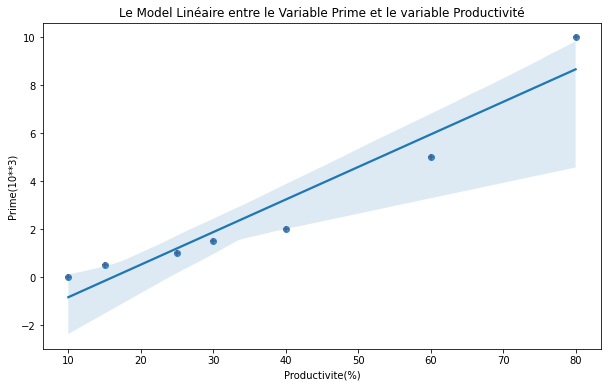

In [42]:
plt.scatter(x='productivite' , y='prime' , data=df , marker='+' , color='red')
sns.regplot(x='productivite' , y='prime' , data=df)
plt.xlabel('Productivite(%)')
plt.ylabel('Prime(10**3)')
plt.title('Le Model Linéaire entre le Variable Prime et le variable Productivité')
plt.show()



In [43]:
reg = linear_model.LinearRegression()

In [44]:
productiv = df.drop('prime' , axis=1)
prime = df.prime

In [45]:
print(productiv.shape , prime.shape)
#X ==> 2D             , Y ==> 1D

(7, 1) (7,)


In [46]:
reg.fit(productiv , prime)

LinearRegression()

In [47]:
reg.coef_ , reg.intercept_

(array([0.13568738]), -2.1826741996233525)

###***l'équation donc est : Y = 0.1357X - 2.1827 ; Prime = 0.1357(Productivité) - 2.1827***

#**EXO 02**

In [48]:
from xlrd.book import colname
df2 = pd.read_excel('/content/exo2serie3.xlsx' , index_col='Années' , names = ['Années' , 'BP' , 'CA'])

In [49]:
df2

,BP,CA
Années,,
2004,20,700
2005,40,900
2006,60,950
2007,80,1100
2008,100,1250
2009,120,1300
2010,140,1500
2011,160,1800
2012,180,2200


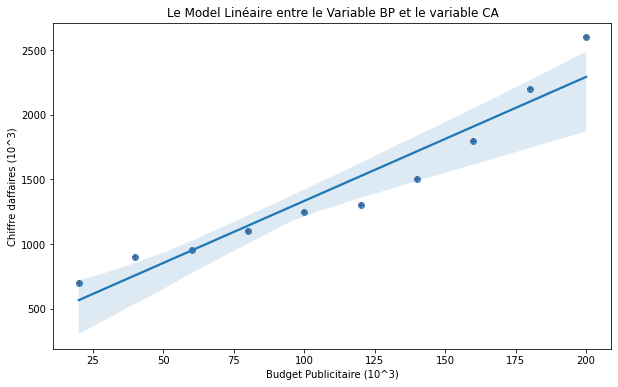

In [50]:
plt.scatter(x='BP' , y='CA' , data=df2 , marker='+' , color='red')
sns.regplot(x='BP' , y='CA' , data=df2)
plt.xlabel('Budget Publicitaire (10^3)')
plt.ylabel('Chiffre daffaires (10^3)')
plt.title('Le Model Linéaire entre le Variable BP et le variable CA')
plt.show()

In [51]:
bp = df2.drop('CA' , axis=1)
ca = df2.CA

In [52]:
reg.fit(bp , ca)

LinearRegression()

In [53]:
reg.coef_ , reg.intercept_

(array([9.60606061]), 373.33333333333326)

###***l'équation donc est : Y = 9,606X + 373,33 ; CA = 9,606(BP) + 373,33***

#**EXO 03**

In [54]:
df3 = pd.read_excel('/content/exo3serie3.xlsx' , index_col='Années' , names=['Années' , 'depenses' , 'ventes'])
df3

,depenses,ventes
Années,,
1,95,98
2,92,94
3,103,110
4,115,125
5,77,82
6,79,84
7,105,112
8,94,99
9,85,93


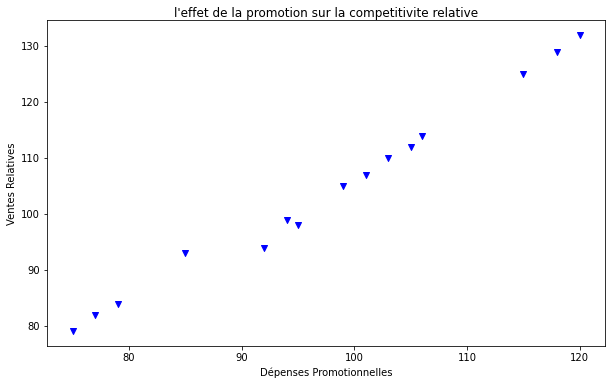

In [55]:
plt.scatter(x='depenses' , y='ventes' , data=df3 , marker='v' , color='b')
plt.xlabel('Dépenses Promotionnelles')
plt.ylabel('Ventes Relatives')
plt.title("l'effet de la promotion sur la competitivite relative" , pad=3)
plt.show()

**1 / Interpretation** : 

D'aprés le Graphique qu'il s'agit d'un nuage des points(2D° et qui represente l'effet de la promotion sur la compétitivité relatives et qui mesure dans l'abcisse les dépenses promotionnelles et dans l'ordonnée présente le volume des ventes relatives .

On voit qu'il y a une relation linéaire positives entre les dépenses et les ventes , càd : le volume des ventes augmentent lorsque il y a une augmentation aux niveaux des dépenses.

**2/**

La mesure utilisée pour déterminer s'il existe une relation entre 2 variable est la **Coefficient de corrélation linéaire PEARSON** car les variables étudiées sont des variables quantitatives.

In [56]:
(3)**2

9

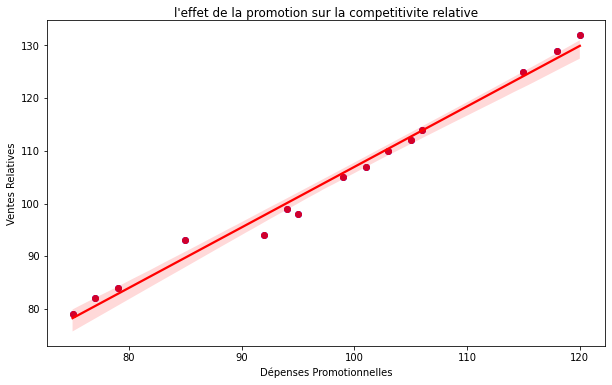

In [57]:
plt.scatter(x='depenses' , y='ventes' , data=df3 , marker='o' , color='blue')
sns.regplot(x='depenses' , y='ventes' , data=df3 , color='red')
plt.xlabel('Dépenses Promotionnelles')
plt.ylabel('Ventes Relatives')
plt.title("l'effet de la promotion sur la competitivite relative" , pad=3)
plt.show()



In [58]:
depenses = df3.drop('ventes' , axis=1) #2D
ventes = df3.ventes #1D
reg.fit(depenses , ventes)

LinearRegression()

In [59]:
reg.coef_ , reg.intercept_

(array([1.14884012]), -7.9267953882483795)

###***l'équation donc est : Y = 1,1488X -7,9268 ==> Ventes Relatives = 1,1488(Dépenses Promo) -7,9268***

**3 /Interpretation**

D'aprés l'équation de la régression Linéaire , donnera que le Coefficient de regression montre que l'augmentation d'une unité de dépenses Promotionnelles relatives engendrera une augmentation de 1,1488 d'unités des ventes relatives .

L'intercept de l'équation qui égale à -7,9268 montre une valeur négative des ventes relatives lorsque les dépenses promotionnelles sont nulles

**4/ Tester La significativité:**

On a 2 Hypothèses :      
H0 : il n'éxiste pas une relation entre les Variables ==> intercept =0

H1 : il Existe une relation ==> intercept # 0 .

Pour tester la significativité on va prend **le Test de Student**

In [60]:
from math import sqrt
import cmath
def t_test(x,y):
  ddl = len(x) - 2
  reg.fit(x , y) # X doit être 2D et Y doit être 1D
  b = np.round(reg.intercept_)
  vx = x.var()
  vy = y.var()
  p1 = (vy/vx)-(b**2)
  p2 = p1/ddl
  #sigma_b = (math.sqrt(p2))
  #t_calcul = b/sigma_b
  
  return(print('tau carrée calculée =  ' , p2 ))

In [61]:
depenses.var()

depenses    205.685714
dtype: float64

In [62]:
math.sqrt(df3.depenses.mean())

9.879271228182775

In [63]:
t_test(depenses , ventes)

tau carrée calculée =   depenses   -4.820221
dtype: float64


In [64]:
import statsmodels.api as sm
from scipy import stats

In [65]:
X2 = sm.add_constant(depenses)
est = sm.OLS(ventes, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     992.0
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.16e-13
Time:                        14:56:35   Log-Likelihood:                -30.285
No. Observations:                  15   AIC:                             64.57
Df Residuals:                      13   BIC:                             65.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9268      3.596     -2.204      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
